In [95]:
from logprocessor import devs_output_to_list_of_dict
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt


raw_data = devs_output_to_list_of_dict('devs_outputs/teacup/teacup.out')
data = pd.DataFrame.from_records(raw_data,
                                 columns=['time_in_seconds', 'port', 'value'],
                                 coerce_float=True)
data['value'] = pd.to_numeric(data['value']) 
data['Modelo'] = 'DEVS'    
del data['port']



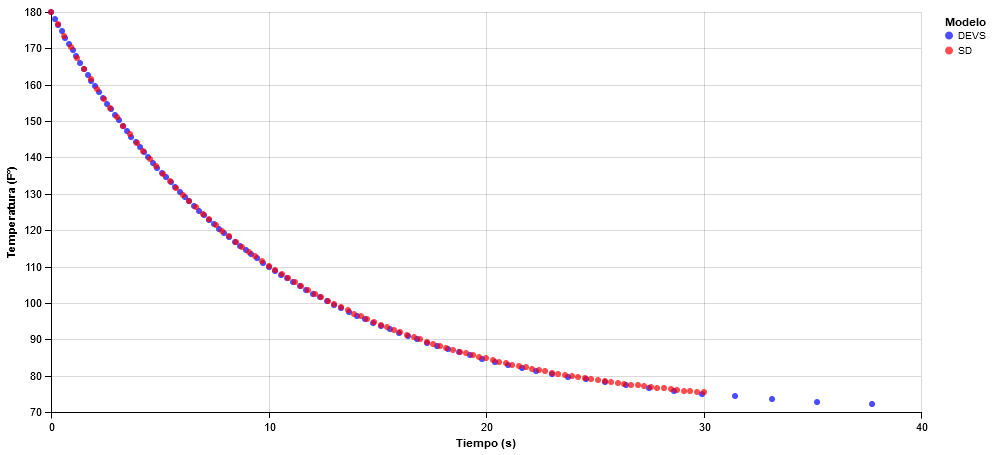

In [94]:
from altair import *


sd_data = pd.read_csv('sd_outputs/sd_teacup.csv')
sd_data['Modelo'] = 'SD'

both_data = data.reset_index().append(sd_data)
both_data = both_data.loc[both_data['time_in_seconds'] < 40]

Chart(both_data).mark_circle().encode(
    x=X('time_in_seconds:Q', axis=Axis(title='Tiempo (s)')),
    y=Y('value:Q',axis=Axis(title='Temperatura (F°)'),scale=Scale(domain=(70, 180), clamp=True)),
    color=Color('Modelo:N',scale=Scale(range=['blue','red']))
).configure_cell(width=870, height=400)